In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from collections import defaultdict
import time
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
label =100

In [2]:
filename_supplementary = 'NBclassifier_supplementary.joblib'+ str(label)+'.pkl.npz'
data_load = np.load(filename_supplementary)
idx2target = data_load["idx2target"].item()
tar2idx = data_load["tar2idx"].item()
words_most_common = data_load["words_most_common"].item()
n_most_common = len(words_most_common)

In [3]:
#--------------
# dev data (filtered)
LineReader = csv.reader(open("row640.csv"), delimiter=',')
row_num = 0
Rows = [(row[0],row[1]) for row in LineReader]
dev_data = [" ".join([w for w in row[1].split() if w in words_most_common]) for row in Rows]
dev_target_idx = [tar2idx[row[0]] for row in Rows]
#--------------

In [4]:
T0 = time.time()
filename = 'NBclassifier.joblib'+ str(label)+'.pkl'
text_clf = joblib.load(filename)
print("Elapsed time:",time.time() - T0)

('Elapsed time:', 11.327661037445068)


In [5]:
T0 = time.time()
import numpy as np
dev_predicted = text_clf.predict(dev_data)
print(np.mean(dev_predicted == dev_target_idx),"Elapsed time:",time.time() - T0)

(0.9421875, 'Elapsed time:', 0.417935848236084)


In [6]:
n_categories= len(tar2idx)
confusion = np.zeros((n_categories, n_categories),dtype = np.float64)
for i in range(len(dev_target_idx)):
    confusion[ dev_target_idx[i] ][dev_predicted[i]] += 1

for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

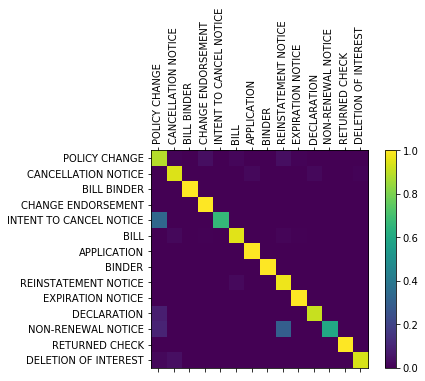

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
fig.colorbar(cax)
# Set up axes
ax.set_xticklabels([''] + list(tar2idx.keys()), rotation=90)
ax.set_yticklabels([''] + list(tar2idx.keys()))

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
# sphinx_gallery_thumbnail_number = 2
plt.show()
fig.savefig('confusion.png')